<a href="https://colab.research.google.com/github/wissal9999999999999/link-prediciton/blob/main/link_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Upload libraries
---



In [1]:
!pip install rdflib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.2 MB/s eta 0:00:00


In [2]:
!pip install absl-py==0.15.0 astunparse==1.6.3 cached-property==1.5.2 cachetools==4.2.4 certifi==2020.12.5 chardet==4.0.0 charset-normalizer==2.0.7 clang==5.0 click==8.0.3 cycler==0.11.0 decorator==4.4.2 flatbuffers==1.12 gast==0.4.0 gensim==4.1.2 google-auth==1.35.0 google-auth-oauthlib==0.4.6 google-pasta==0.2.0 googledrivedownloader==0.4 grpcio==1.41.1 h5py==3.1.0 idna==3.3 importlib-metadata==4.8.2 isodate==0.6.0 Jinja2==3.0.3 joblib==1.2.0 keras==2.6.0 Keras-Preprocessing==1.1.2 kiwisolver==1.3.1 llvmlite==0.36.0 Markdown==3.3.5 MarkupSafe==2.0.1 matplotlib==3.3.4 networkx==2.5.1 nltk==3.6.5 numba==0.53.1 numpy==1.19.5 oauthlib==3.1.1 opt-einsum==3.3.0 Owlready2==0.25 pandas==1.1.5 Pillow==8.4.0 protobuf==3.19.1 pyasn1==0.4.8 pyasn1-modules==0.2.8 pyparsing==2.4.7 pyRDF2Vec==0.0.5 python-dateutil==2.8.2 python-louvain==0.15 pytz==2021.3 PyYAML==6.0 rdflib==4.2.2 regex==2021.11.10 requests==2.26.0 requests-oauthlib==1.3.0 rsa==4.7.2 scikit-learn==0.24.2 scipy==1.5.4 seaborn==0.11.2 six==1.15.0 sklearn==0.0 smart-open==5.2.1 snore-embedding==0.3.3 stellargraph==1.2.1 tensorboard==2.6.0 tensorboard-data-server==0.6.1 tensorboard-plugin-wit==1.8.0 tensorflow==2.6.2 tensorflow-estimator==2.6.0 termcolor==1.1.0 threadpoolctl==3.0.0 tqdm==4.62.3 typing-extensions==3.7.4.3 urllib3==1.26.7 Werkzeug==2.0.2 wrapt==1.12.1 yacs==0.1.8 zipp==3.6.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.4/371.4 kB 25.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: T

# Upload ontology




In [3]:
from google.colab import files
import rdflib

# Définir une fonction pour charger une ontologie à partir d'un fichier OWL

def load_ontology():
    # Demander à l'utilisateur de télécharger le fichier OWL de l'ontologie
    print("Veuillez sélectionner le fichier OWL de l'ontologie:")
    uploaded = files.upload()

    # Parcourir les fichiers téléchargés
    for filename in uploaded.keys():
        file_path = filename
        print(f"Fichier téléchargé: '{file_path}'")

        # Charger l'ontologie à partir du fichier OWL
        g = rdflib.Graph()
        g.parse(file_path, format="xml")

        return g

# Charger l'ontologie
ontology_graph = load_ontology()


Veuillez sélectionner le fichier OWL de l'ontologie:


Saving LiverOnto.owl to LiverOnto.owl
Fichier téléchargé: 'LiverOnto.owl'


# Define a function to count entities in the RDF graph and show classes



In [4]:
def count_entities(graph):
    concepts = set()
    properties = set()
    individuals = set()

    for subject, predicate, obj in graph:
        # Counting concepts (classes)
        if predicate == rdflib.RDF.type and obj == rdflib.OWL.Class:
            concepts.add(subject)
        elif predicate == rdflib.RDF.type and (obj == rdflib.OWL.ObjectProperty or obj == rdflib.OWL.DatatypeProperty):
            properties.add(subject)
        # Counting individuals
        elif predicate == rdflib.RDF.type and obj != rdflib.OWL.Class and obj != rdflib.OWL.ObjectProperty and obj != rdflib.OWL.DatatypeProperty:
            individuals.add(subject)

    return len(concepts), len(properties), len(individuals)

# Appel de la fonction pour obtenir les nombres
concept_count, property_count, individual_count = count_entities(ontology_graph)
print("Nombre de concepts :", concept_count)
print("Nombre de propriétés :", property_count)
print("Nombre d'individus :", individual_count)


Nombre de concepts : 33
Nombre de propriétés : 29
Nombre d'individus : 1232


In [5]:
from rdflib import RDF, RDFS, OWL


In [6]:
def display_ontology_info(graph):
    # Initialiser des ensembles pour stocker les noms uniques
    classes = set()
    properties = set()
    swrl_rules = set()

    # Parcourir les triplets de l'ontologie
    for subject, predicate, obj in graph:
        # Vérifier le type de triplet
        if predicate == RDF.type:
            # Si le triplet représente une classe
            if obj == OWL.Class:
                classes.add(graph.namespace_manager.qname(subject))
            # Si le triplet représente une propriété
            elif obj == RDF.Property or obj == OWL.ObjectProperty or obj == OWL.DatatypeProperty:
                properties.add(graph.namespace_manager.qname(subject))
            # Si le triplet représente une règle SWRL
            elif obj == OWL.NamedIndividual:
                swrl_rules.add(graph.namespace_manager.qname(subject))

    # Afficher les noms des classes, des propriétés et des règles SWRL
    print("Classes:")
    for class_name in classes:
        print(class_name)

    print("\nPropriétés:")
    for property_name in properties:
        print(property_name)

    print("\nRègles SWRL:")
    for swrl_rule_name in swrl_rules:
        print(swrl_rule_name)

# Appeler la fonction pour afficher les noms des classes, des propriétés et des règles SWRL de l'ontologie
display_ontology_info(ontology_graph)


Classes:
BCLC-System
UltimateStage
Cholestatic
IntermediateStage
T
Liver
Inherited
Hapatocellular-Carcinoma
LiverCancer
References
Patient
Nodule
EarlyStage
Treatment
AlcoholRelatedLiverDisease
TNM-System
Cancer
Risk-Factors
Cirrhosis
Hepatitis
Symptoms
M
WLSON
StageTNM
VeryEarlyStage
N
AutoimmuneLiverDisease
MedicalIntervention
Diagnosis
AdvancedStage
FattyLiverDisease
TypesLiverCancer
Disease

Propriétés:
LiverSize
has-N
hasBiluribine
classifiedInto
isObese
composedOf
hasSymptoms
hasSpreadOtherPart
hasAge
hasSexe
hasFunctionalIndex
hasPortalVeinPressure
hasOtherDisease
has-T
noduleSize
contains
hasTumor
diagnosedBy
hasCauses
hasSpreadLymphNodes
isAlcoholic
LiverShape
hasSpreadBloodVessels
isDiabete
noduleNumber
hasHereditaryDiseases
treatedBy
has-M
hasScoreChildPugh

Règles SWRL:
AlcoholicFattyLiverDisease
Joint-pain
n0
Hepatitis-C
Cancer10
C1
Blood_tests
D
Cancer12
Cancer13
Hepatitis-A
Tobbaco
A3
L1
Swollen_abdomen
T1
TX
M0
Inflammation-Of-Liver
Aflatoxin
M1
Cancer11
Fatigue
Diabete

ontology to json file

In [ ]:
!pip install owlready2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 41.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.45-cp310-cp310-linux_x86_64.whl size=24077398 sha256=dabc35fd24d8c5130ff6474dbb33a1832d12be4e5ac778e7453d4e9829264ff1
  Stored in directory: /root/.cache/pip/wheels/5c/f4/9d/249b1671d391e3feddd443c7d0eb79a732afabc9f370591271
Successfully built owlready2


La classe OntologyProjection est responsable de projeter l'ontologie en un graphe RDF et de l'extraire dans un format JSON.
Les méthodes dans OntologyProjection construisent les requêtes SPARQL pour extraire différentes parties de l'ontologie, telles que les sous-classes, les équivalences de classes, les domaines et les plages de propriétés, etc.

In [ ]:
from google.colab import drive

# Montez Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
import argparse

# Chargez le fichier depuis votre ordinateur
uploaded = files.upload()

# Obtenez le nom du fichier téléchargé
filename = next(iter(uploaded))

# Définissez le chemin de sortie pour le fichier JSON
out = "output.json"

Saving LiverOnto.owl to LiverOnto (1).owl


In [ ]:
from owlready2 import *
from rdflib import Graph, URIRef
from rdflib.namespace import RDF, RDFS
import re
import json
import argparse

# Load an ontology from an OWL file, convert this ontology into an RDF graph, and execute SPARQL queries on this graph.

In [7]:
class OntoAccess:
    def __init__(self, filename):
        self.filename = filename
        self.load_ontology()

    def load_ontology(self):
        self.onto = get_ontology(self.filename).load()
        owlready2.reasoning.JAVA_MEMORY = '13351'
        self.graph = default_world.as_rdflib_graph()

    def queryGraph(self, query):
        results = self.graph.query(query)
        return list(results)


In [8]:
class OntologyProjection:
    def __init__(self, filename):
        self.onto = OntoAccess(filename)
        self.projection = Graph()

    def getQueryForAtomicClassSubsumptions(self):
        return """SELECT ?s ?o WHERE { ?s <http://www.w3.org/2000/01/rdf-schema#subClassOf> ?o .
        FILTER (isIRI(?s) && isIRI(?o)
        && str(?o) != 'http://www.w3.org/2002/07/owl#Nothing'
        && str(?s) != 'http://www.w3.org/2002/07/owl#Nothing'
        && str(?o) != 'http://www.w3.org/2002/07/owl#Thing'
        && str(?s) != 'http://www.w3.org/2002/07/owl#Thing'
        )
        }"""

    def getQueryForAtomicClassEquivalences(self):
        return """SELECT ?s ?o WHERE { ?s <http://www.w3.org/2002/07/owl#equivalentClass> ?o .
        FILTER (isIRI(?s) && isIRI(?o)
        && str(?o) != 'http://www.w3.org/2002/07/owl#Nothing'
        && str(?s) != 'http://www.w3.org/2002/07/owl#Nothing'
        && str(?o) != 'http://www.w3.org/2002/07/owl#Thing'
        && str(?s) != 'http://www.w3.org/2002/07/owl#Thing'
        )
        }"""

    def getQueryForAllClassTypes(self):
        return """SELECT ?s ?o WHERE { ?s <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> ?o .
        FILTER (isIRI(?s) && isIRI(?o)
        && str(?o) != 'http://www.w3.org/2002/07/owl#Ontology'
        && str(?o) != 'http://www.w3.org/2002/07/owl#AnnotationProperty'
        && str(?o) != 'http://www.w3.org/2002/07/owl#ObjectProperty'
        && str(?o) != 'http://www.w3.org/2002/07/owl#Class'
        && str(?o) != 'http://www.w3.org/2002/07/owl#DatatypeProperty'
        && str(?o) != 'http://www.w3.org/2002/07/owl#Restriction'
        && str(?o) != 'http://www.w3.org/2002/07/owl#NamedIndividual'
        && str(?o) != 'http://www.w3.org/2002/07/owl#Thing'
        && str(?o) != 'http://www.w3.org/2002/07/owl#TransitiveProperty'
        && str(?o) != 'http://www.w3.org/2002/07/owl#FunctionalProperty'
        && str(?o) != 'http://www.w3.org/2002/07/owl#InverseFunctionalProperty'
        && str(?o) != 'http://www.w3.org/2002/07/owl#SymmetricProperty'
        && str(?o) != 'http://www.w3.org/2002/07/owl#AsymmetricProperty'
        && str(?o) != 'http://www.w3.org/2002/07/owl#ReflexiveProperty'
        && str(?o) != 'http://www.w3.org/2002/07/owl#IrreflexiveProperty'
        )
        }"""

    def getQueryForAllSameAs(self):
        return """SELECT ?s ?o WHERE { ?s <http://www.w3.org/2002/07/owl#sameAs> ?o .
        filter( isIRI(?s) && isIRI(?o))
        }"""

    def getQueryForDomainAndRange(self, prop_uri):
        return """SELECT DISTINCT ?d ?r WHERE {{ <{prop}> <http://www.w3.org/2000/01/rdf-schema#domain> ?d .
        <{prop}> <http://www.w3.org/2000/01/rdf-schema#range> ?r .
        FILTER (isIRI(?d) && isIRI(?r))
        }}""".format(prop=prop_uri)

    def getQueryForDomain(self, prop_uri):
        return """SELECT DISTINCT ?d WHERE {{ <{prop}> <http://www.w3.org/2000/01/rdf-schema#domain> ?d .
        FILTER (isIRI(?d))
        }}""".format(prop=prop_uri)

    def getQueryForRange(self, prop_uri):
        return """SELECT DISTINCT ?r WHERE {{
        <{prop}> <http://www.w3.org/2000/01/rdf-schema#range> ?r .
        FILTER (isIRI(?r))
        }}""".format(prop=prop_uri)

    def getQueryForComplexDomain(self, prop_uri):
        return """SELECT DISTINCT ?d where {{
        {{
        <{prop}> <http://www.w3.org/2000/01/rdf-schema#domain> [ <http://www.w3.org/2002/07/owl#intersectionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?d ] ] ] .
        }}
        UNION
        {{
        <{prop}> <http://www.w3.org/2000/01/rdf-schema#domain> [ <http://www.w3.org/2002/07/owl#unionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?d ] ] ] .
        }}
        filter( isIRI( ?d ) )
        }}""".format(prop=prop_uri)

    def getQueryForComplexRange(self, prop_uri):
        return """SELECT DISTINCT ?r where {{
        {{
        <{prop}> <http://www.w3.org/2000/01/rdf-schema#range> [ <http://www.w3.org/2002/07/owl#intersectionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?r ] ] ] .
        }}
        UNION
        {{
        <{prop}> <http://www.w3.org/2000/01/rdf-schema#range> [ <http://www.w3.org/2002/07/owl#unionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?r ] ] ] .
        }}
        filter( isIRI( ?r ) )
        }}""".format(prop=prop_uri)

    def getQueryForRestrictionsRHSSubClassOf(self, prop_uri):
        return """SELECT DISTINCT ?s ?o WHERE {{
        ?s <http://www.w3.org/2000/01/rdf-schema#subClassOf> ?bn .
        ?bn <http://www.w3.org/2002/07/owl#onProperty> <{prop}> .
        {{
        ?bn <http://www.w3.org/2002/07/owl#someValuesFrom> ?o .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#allValuesFrom> ?o .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#onClass> ?o .
        }}
        FILTER (isIRI(?s) && isIRI(?o))
        }}""".format(prop=prop_uri)

    def getQueryForRestrictionsRHSEquivalent(self, prop_uri):
        return """SELECT DISTINCT ?s ?o WHERE {{
        ?s <http://www.w3.org/2002/07/owl#equivalentClass> ?bn .
        ?bn <http://www.w3.org/2002/07/owl#onProperty> <{prop}> .
        {{
        ?bn <http://www.w3.org/2002/07/owl#someValuesFrom> ?o .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#allValuesFrom> ?o .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#onClass> ?o .
        }}
        FILTER (isIRI(?s) && isIRI(?o))
        }}""".format(prop=prop_uri)

    def getQueryForRestrictionsLHS(self, prop_uri):
        return """SELECT DISTINCT ?s ?o WHERE {{
        ?bn <http://www.w3.org/2000/01/rdf-schema#subClassOf> ?s .
        ?bn <http://www.w3.org/2002/07/owl#onProperty> <{prop}> .
        {{
        ?bn <http://www.w3.org/2002/07/owl#someValuesFrom> ?o .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#allValuesFrom> ?o .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#onClass> ?o .
        }}
        FILTER (isIRI(?s) && isIRI(?o))
        }}""".format(prop=prop_uri)

    def getQueryForComplexRestrictionsLHS(self, prop_uri):
        return """SELECT DISTINCT ?s ?o WHERE {{
        ?bn <http://www.w3.org/2000/01/rdf-schema#subClassOf> ?s .
        ?bn <http://www.w3.org/2002/07/owl#onProperty> <{prop}> .
        {{
        ?bn <http://www.w3.org/2002/07/owl#someValuesFrom> [ <http://www.w3.org/2002/07/owl#intersectionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?o ] ] ] .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#allValuesFrom> [ <http://www.w3.org/2002/07/owl#intersectionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?o ] ] ] .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#onClass> [ <http://www.w3.org/2002/07/owl#intersectionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?o ] ] ] .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#someValuesFrom> [ <http://www.w3.org/2002/07/owl#unionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?o ] ] ] .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#allValuesFrom> [ <http://www.w3.org/2002/07/owl#unionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?o ] ] ] .
        }}
        UNION
        {{
        ?bn <http://www.w3.org/2002/07/owl#onClass> [ <http://www.w3.org/2002/07/owl#unionOf> [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#rest>* [ <http://www.w3.org/1999/02/22-rdf-syntax-ns#first> ?o ] ] ] .
        }}
        FILTER (isIRI(?s) && isIRI(?o))
        }}""".format(prop=prop_uri)

    def getQueryObjectRoleAssertions(self, prop_uri):
        return """SELECT ?s ?o WHERE {{ ?s <{prop}> ?o .
        filter( isIRI(?s) && isIRI(?o) )
        }}""".format(prop=prop_uri)

    def getQueryForInverses(self, prop_uri):
        return """SELECT DISTINCT ?p WHERE {{
        {{
        ?p <http://www.w3.org/2002/07/owl#inverseOf> <{prop}> .
        }}
        UNION
        {{
        <{prop}> <http://www.w3.org/2002/07/owl#inverseOf> ?p .
        }}
        filter(isIRI(?p))
        }}""".format(prop=prop_uri)

    def getQueryForAtomicEquivalentObjectProperties(self, prop_uri):
        return """SELECT DISTINCT ?p WHERE {{
        {{
        ?p <http://www.w3.org/2002/07/owl#equivalentProperty> <{prop}> .
        }}
        UNION
        {{
        <{prop}> <http://www.w3.org/2002/07/owl#equivalentProperty> ?p .
        }}
        FILTER (isIRI(?p))
        }}""".format(prop=prop_uri)

    def getQueryForDataRestrictionsRHSSubClassOf(self, prop_uri):
        return """SELECT DISTINCT ?s WHERE {{
        ?s <http://www.w3.org/2000/01/rdf-schema#subClassOf> ?bn .
        ?bn <http://www.w3.org/2002/07/owl#onProperty> <{prop}> .
        FILTER (isIRI(?s))
        }}""".format(prop=prop_uri)

    def getQueryForDataRestrictionsRHSEquivalent(self, prop_uri):
        return """SELECT DISTINCT ?s WHERE {{
        ?s <http://www.w3.org/2002/07/owl#equivalentClass> ?bn .
        ?bn <http://www.w3.org/2002/07/owl#onProperty> <{prop}> .
        FILTER (isIRI(?s))
        }}""".format(prop=prop_uri)

    def getQueryDataRoleAssertions(self, prop_uri):
        return """SELECT ?s ?o WHERE {{ ?s <{prop}> ?o .
        filter( isIRI(?s) )
        }}""".format(prop=prop_uri)

    def getQueryForAtomicEquivalentDataProperties(self, prop_uri):
        return """SELECT DISTINCT ?p WHERE {{
        {{
        ?p <http://www.w3.org/2002/07/owl#equivalentProperty> <{prop}> .
        }}
        UNION
        {{
        <{prop}> <http://www.w3.org/2002/07/owl#equivalentProperty> ?p .
        }}
        FILTER (isIRI(?p))
        }}""".format(prop=prop_uri)

    def __propagateDomainTbox__(self, source):
        for domain_cls in self.domains:
            if str(source) == str(domain_cls):
                continue
            self.projection.add((source, RDFS.subClassOf, domain_cls))

    def __propagateRangeTbox__(self, target):
        for range_cls in self.ranges:
            if str(target) == str(range_cls):
                continue
            self.projection.add((target, RDFS.subClassOf, range_cls))

    def __propagateDomainAbox__(self, source):
        for domain_cls in self.domains:
            self.projection.add((source, RDF.type, domain_cls))

    def __propagateRangeAbox__(self, target):
        for range_cls in self.ranges:
            self.projection.add((target, RDF.type, range_cls))

    def __processPropertyResults__(self, prop_iri, results, are_tbox_results, add_triple):
        for row in results:
            if add_triple:
                self.projection.add((row[0], URIRef(prop_iri), row[1]))

                if not row[0] in self.triple_dict:
                    self.triple_dict[row[0]] = set()
                self.triple_dict[row[0]].add(row[1])

            if are_tbox_results:
                self.__propagateDomainTbox__(row[0])
                try:
                    self.__propagateRangeTbox__(row[1])
                except:
                    pass
            else:
                self.__propagateDomainAbox__(row[0])
                try:
                    self.__propagateRangeAbox__(row[1])
                except:
                    pass

    def __extractTriplesFromComplexAxioms__(self):
        for cls in self.onto.onto.classes():
            expressions = set()
            expressions.update(cls.is_a, cls.equivalent_to)
            for cls_exp in expressions:
                try:
                    for cls_exp2 in cls_exp.Classes:
                        try:
                            self.projection.add((URIRef(cls.iri), RDFS.subClassOf, URIRef(cls_exp2.iri)))
                        except AttributeError:
                            try:
                                self.__extractTriplesForRestriction__(cls, cls_exp2)
                            except AttributeError:
                                pass
                except AttributeError:
                    try:
                        self.__extractTriplesForRestriction__(cls, cls_exp)
                    except AttributeError:
                        pass

    def __extractTriplesForRestriction__(self, cls, cls_exp_rest):
        try:
            targets = set()
            property_iri = cls_exp_rest.property.iri
            if property_iri in self.domains_dict:
                for domain_cls in self.domains_dict[property_iri]:
                    if str(cls.iri) == str(domain_cls):
                        continue
                    self.projection.add((URIRef(cls.iri), RDFS.subClassOf, domain_cls))
            if hasattr(cls_exp_rest.value, "Classes"):
                for target_cls in cls_exp_rest.value.Classes:
                    if hasattr(target_cls, "iri"):
                        targets.add(target_cls.iri)
            elif hasattr(cls_exp_rest.value, "iri"):
                target_cls_iri = cls_exp_rest.value.iri
                if not target_cls_iri == "http://www.w3.org/2002/07/owl#Thing" and not target_cls_iri == "http://www.w3.org/2000/01/rdf-schema#Literal":
                    targets.add(target_cls_iri)
                    if property_iri in self.ranges_dict:
                        for range_cls in self.ranges_dict[property_iri]:
                            if str(target_cls_iri) == str(range_cls):
                                continue
                            self.projection.add((URIRef(target_cls_iri), RDFS.subClassOf, range_cls))
            for target_cls in targets:
                self.projection.add((URIRef(cls.iri), URIRef(property_iri), URIRef(target_cls)))
                results = self.onto.queryGraph(self.getQueryForInverses(property_iri))
                for row in results:
                    self.projection.add((URIRef(target_cls), row[0], URIRef(cls.iri)))
                results = self.onto.queryGraph(self.getQueryForAtomicEquivalentObjectProperties(property_iri))
                for row in results:
                    self.projection.add((URIRef(cls.iri), row[0], URIRef(target_cls)))
        except AttributeError:
            pass

    def extract_projection(self):
        self.projection.bind("owl", "http://www.w3.org/2002/07/owl#")
        self.projection.bind("skos", "http://www.w3.org/2004/02/skos/core#")
        self.projection.bind("obo1", "http://www.geneontology.org/formats/oboInOwl#")
        self.projection.bind("obo2", "http://www.geneontology.org/formats/oboInOWL#")
        results = self.onto.queryGraph(self.getQueryForAtomicClassSubsumptions())
        for row in results:
            self.projection.add((row[0], RDFS.subClassOf, row[1]))

        results = self.onto.queryGraph(self.getQueryForAtomicClassEquivalences())
        for row in results:
            self.projection.add((row[0], RDFS.subClassOf, row[1]))
            self.projection.add((row[1], RDFS.subClassOf, row[0]))

        results = self.onto.queryGraph(self.getQueryForAllClassTypes())
        for row in results:
            self.projection.add((row[0], RDF.type, row[1]))

        results = self.onto.queryGraph(self.getQueryForAllSameAs())
        for row in results:
            self.projection.add((row[0], URIRef("http://www.w3.org/2002/07/owl#sameAs"), row[1]))
            self.projection.add((row[1], URIRef("http://www.w3.org/2002/07/owl#sameAs"), row[0]))

        self.triple_dict = {}
        self.domains = set()
        self.ranges = set()
        self.domains_dict = {}
        self.ranges_dict = {}

        for prop in list(self.onto.onto.object_properties()):
            self.domains_dict[prop.iri]=set()
            self.ranges_dict[prop.iri]=set()
            self.triple_dict.clear()
            self.domains.clear()
            self.ranges.clear()

            results = self.onto.queryGraph(self.getQueryForDomainAndRange(prop.iri))
            self.__processPropertyResults__(prop.iri, results, True, True)

            results_domain = self.onto.queryGraph(self.getQueryForDomain(prop.iri))
            for row_domain in results_domain:
                self.domains.add(row_domain[0])
                self.domains_dict[prop.iri].add(row_domain[0])

            results_range = self.onto.queryGraph(self.getQueryForRange(prop.iri))
            for row_range in results_range:
                self.ranges.add(row_range[0])
                self.ranges_dict[prop.iri].add(row_range[0])

            results_domain = self.onto.queryGraph(self.getQueryForComplexDomain(prop.iri))
            results_range = self.onto.queryGraph(self.getQueryForComplexRange(prop.iri))
            for row_domain in results_domain:
                for row_range in results_range:
                    self.projection.add((row_domain[0], URIRef(prop.iri), row_range[0]))
                    if not row_domain[0] in self.triple_dict:
                        self.triple_dict[row_domain[0]] = set()
                    self.triple_dict[row_domain[0]].add(row_range[0])

            results = self.onto.queryGraph(self.getQueryForRestrictionsRHSSubClassOf(prop.iri))
            self.__processPropertyResults__(prop.iri, results, True, True)
            results = self.onto.queryGraph(self.getQueryForRestrictionsRHSEquivalent(prop.iri))
            self.__processPropertyResults__(prop.iri, results, True, True)

            results = self.onto.queryGraph(self.getQueryForRestrictionsLHS(prop.iri))
            self.__processPropertyResults__(prop.iri, results, True, True)

            results = self.onto.queryGraph(self.getQueryForComplexRestrictionsLHS(prop.iri))
            self.__processPropertyResults__(prop.iri, results, True, True)

            results = self.onto.queryGraph(self.getQueryObjectRoleAssertions(prop.iri))
            self.__processPropertyResults__(prop.iri, results, False, True)

            results = self.onto.queryGraph(self.getQueryForInverses(prop.iri))
            for row in results:
                for sub in self.triple_dict:
                    for obj in self.triple_dict[sub]:
                        self.projection.add((obj, row[0], sub))

            results = self.onto.queryGraph(self.getQueryForAtomicEquivalentObjectProperties(prop.iri))
            for row in results:
                for sub in self.triple_dict:
                    for obj in self.triple_dict[sub]:
                        self.projection.add((sub, row[0], obj))

        for prop in list(self.onto.onto.data_properties()):
            self.domains_dict[prop.iri]=set()
            self.triple_dict.clear()
            self.domains.clear()
            self.ranges.clear()

            results_domain = self.onto.queryGraph(self.getQueryForDomain(prop.iri))
            for row_domain in results_domain:
                self.domains.add(row_domain[0])
                self.domains_dict[prop.iri].add(row_domain[0])

            results = self.onto.queryGraph(self.getQueryForDataRestrictionsRHSSubClassOf(prop.iri))
            self.__processPropertyResults__(prop.iri, results, True, False)

            results = self.onto.queryGraph(self.getQueryForDataRestrictionsRHSEquivalent(prop.iri))
            self.__processPropertyResults__(prop.iri, results, True, False)

            results = self.onto.queryGraph(self.getQueryDataRoleAssertions(prop.iri))
            self.__processPropertyResults__(prop.iri, results, False, False)

            results = self.onto.queryGraph(self.getQueryForAtomicEquivalentDataProperties(prop.iri))
            for row in results:
                for sub in self.triple_dict:
                    for obj in self.triple_dict[sub]:
                        self.projection.add((sub, row[0], obj))

        self.__extractTriplesFromComplexAxioms__()


In [9]:
!ls


LiverOnto.owl  sample_data


# link-prediciton

In [10]:
!pip install snore-embedding

In [11]:
!git clone https://github.com/wissal9999999999999/link-prediciton.git


Cloning into 'link-prediciton'...
remote: Enumerating objects: 440, done.
remote: Counting objects: 100% (440/440), done.
remote: Compressing objects: 100% (279/279), done.
remote: Total 440 (delta 186), reused 396 (delta 154), pack-reused 0
Receiving objects: 100% (440/440), 9.17 MiB | 10.42 MiB/s, done.
Resolving deltas: 100% (186/186), done.


In [ ]:
!cd link-prediciton

In [ ]:
!rm -rf link-prediciton

#  convert an OWL ontology into a JSON representation

In [13]:
pip install owlready2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 24.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.45-cp310-cp310-linux_x86_64.whl size=24077397 sha256=f5037200d16a7bdde86a9034cc227303fd8c59e75646bbdb33386718eba5ef6e
  Stored in directory: /root/.cache/pip/wheels/5c/f4/9d/249b1671d391e3feddd443c7d0eb79a732afabc9f370591271
Successfully built owlready2


Ease of Parsing
Visualization

In [14]:
!python /content/link-prediciton/src/conversion.py --filename "/content/LiverOnto.owl" --out "/content/out.json"


In [ ]:
!pwd

/content


In [15]:
!pip install networkx matplotlib


# Ontology and graph understanding

In [16]:
import networkx as nx
import json

# Charger le fichier JSON contenant le graphe
with open('/content/out.json', 'r') as file:
    graph_data = json.load(file)

# Créer un graphe NetworkX à partir des données JSON
G = nx.Graph()

# Liste pour stocker les noms des classes et des concepts
nodes = []

# Ajouter les classes et les concepts comme noeuds dans le graphe
for node in graph_data['graphs']['nodes']:
    if node['type'] == 'CLASS' or node['type'] == 'INDIVIDUAL':
        node_id = node['id']
        nodes.append(node_id)
        G.add_node(node_id, type=node['type'], label=node['lbl'])

# Ajouter les propriétés comme arêtes dans le graphe
for edge in graph_data['graphs']['edges']:
    sub = edge['sub']
    obj = edge['obj']
    if sub in nodes and obj in nodes:
        G.add_edge(sub, obj, label=edge['pred'])

# Vous pouvez maintenant utiliser G comme votre graphe NetworkX pour effectuer d'autres opérations.


In [17]:
import json
import networkx as nx
from tabulate import tabulate

# Charger le fichier JSON contenant le graphe
with open('/content/out.json', 'r') as file:
    graph_data = json.load(file)

# Créer un graphe NetworkX à partir des données JSON
G = nx.Graph()

# Liste pour stocker les noms des classes et des concepts
nodes = []

# Ajouter les classes et les concepts comme noeuds dans le graphe
for node in graph_data['graphs']['nodes']:
    if node['type'] == 'CLASS' or node['type'] == 'INDIVIDUAL':
        node_id = node['id']
        nodes.append(node_id)
        G.add_node(node_id, type=node['type'], label=node['lbl'])

# Ajouter les propriétés comme arêtes dans le graphe
for edge in graph_data['graphs']['edges']:
    sub = edge['sub']
    obj = edge['obj']
    if sub in nodes and obj in nodes:
        G.add_edge(sub, obj, label=edge['pred'])

# Nombre de noeuds dans le graph
num_nodes = len(G.nodes())

# Nombre d'arêtes dans le graph
num_edges = len(G.edges())


In [18]:
# Charger le fichier JSON contenant le graphe
with open('/content/out.json', 'r') as file:
    graph_data = json.load(file)

# Calculer le nombre de classes et d'individuals
num_classes = len([node for node in graph_data['graphs']['nodes'] if node['type'] == 'CLASS'])
num_individuals = len([node for node in graph_data['graphs']['nodes'] if node['type'] == 'INDIVIDUAL'])

# Extraire le nombre de propriétés
num_properties = len(graph_data['graphs']['edges'])

# Calculer le nombre d'axiomes en utilisant le graphe
num_axioms = num_classes + num_individuals + num_properties

# Créer une liste de tuples pour les informations
info_table = [
    ("Nombre de noeuds dans le graph", num_nodes),
    ("Nombre d'arêtes dans le graph", num_edges),
    ("Nombre de classes de l'ontologie", num_classes),
    ("Nombre d'individuals de l'ontologie", num_individuals),
    ("Nombre de properties de l'ontologie", num_properties),
    ("Nombre d'axioms de l'ontologie", num_axioms),
    ("Nombre de restrictions de l'ontologie", "N/A"),
    ("Nombre de set axioms de l'ontologie", "N/A")
]


In [19]:
!pwd

/content


In [20]:
# Enregistrer les informations dans un fichier texte
with open('ontology_information.txt', 'w') as f:
    f.write(tabulate(info_table, headers=["Informations", "Valeur"], tablefmt="grid"))

print("Informations sur l'ontologie sauvegardées dans le fichier 'ontology_information.txt'")

Informations sur l'ontologie sauvegardées dans le fichier 'ontology_information.txt'


In [21]:
# Lire le contenu du fichier
with open('ontology_information.txt', 'r') as f:
    content = f.read()

# Afficher le contenu
print(content)


+---------------------------------------+----------+
| Informations                          | Valeur   |
+=======================================+==========+
| Nombre de noeuds dans le graph        | 161      |
+---------------------------------------+----------+
| Nombre d'arêtes dans le graph         | 372      |
+---------------------------------------+----------+
| Nombre de classes de l'ontologie      | 33       |
+---------------------------------------+----------+
| Nombre d'individuals de l'ontologie   | 128      |
+---------------------------------------+----------+
| Nombre de properties de l'ontologie   | 384      |
+---------------------------------------+----------+
| Nombre d'axioms de l'ontologie        | 545      |
+---------------------------------------+----------+
| Nombre de restrictions de l'ontologie | N/A      |
+---------------------------------------+----------+
| Nombre de set axioms de l'ontologie   | N/A      |
+---------------------------------------+-----

# Graph visualisation

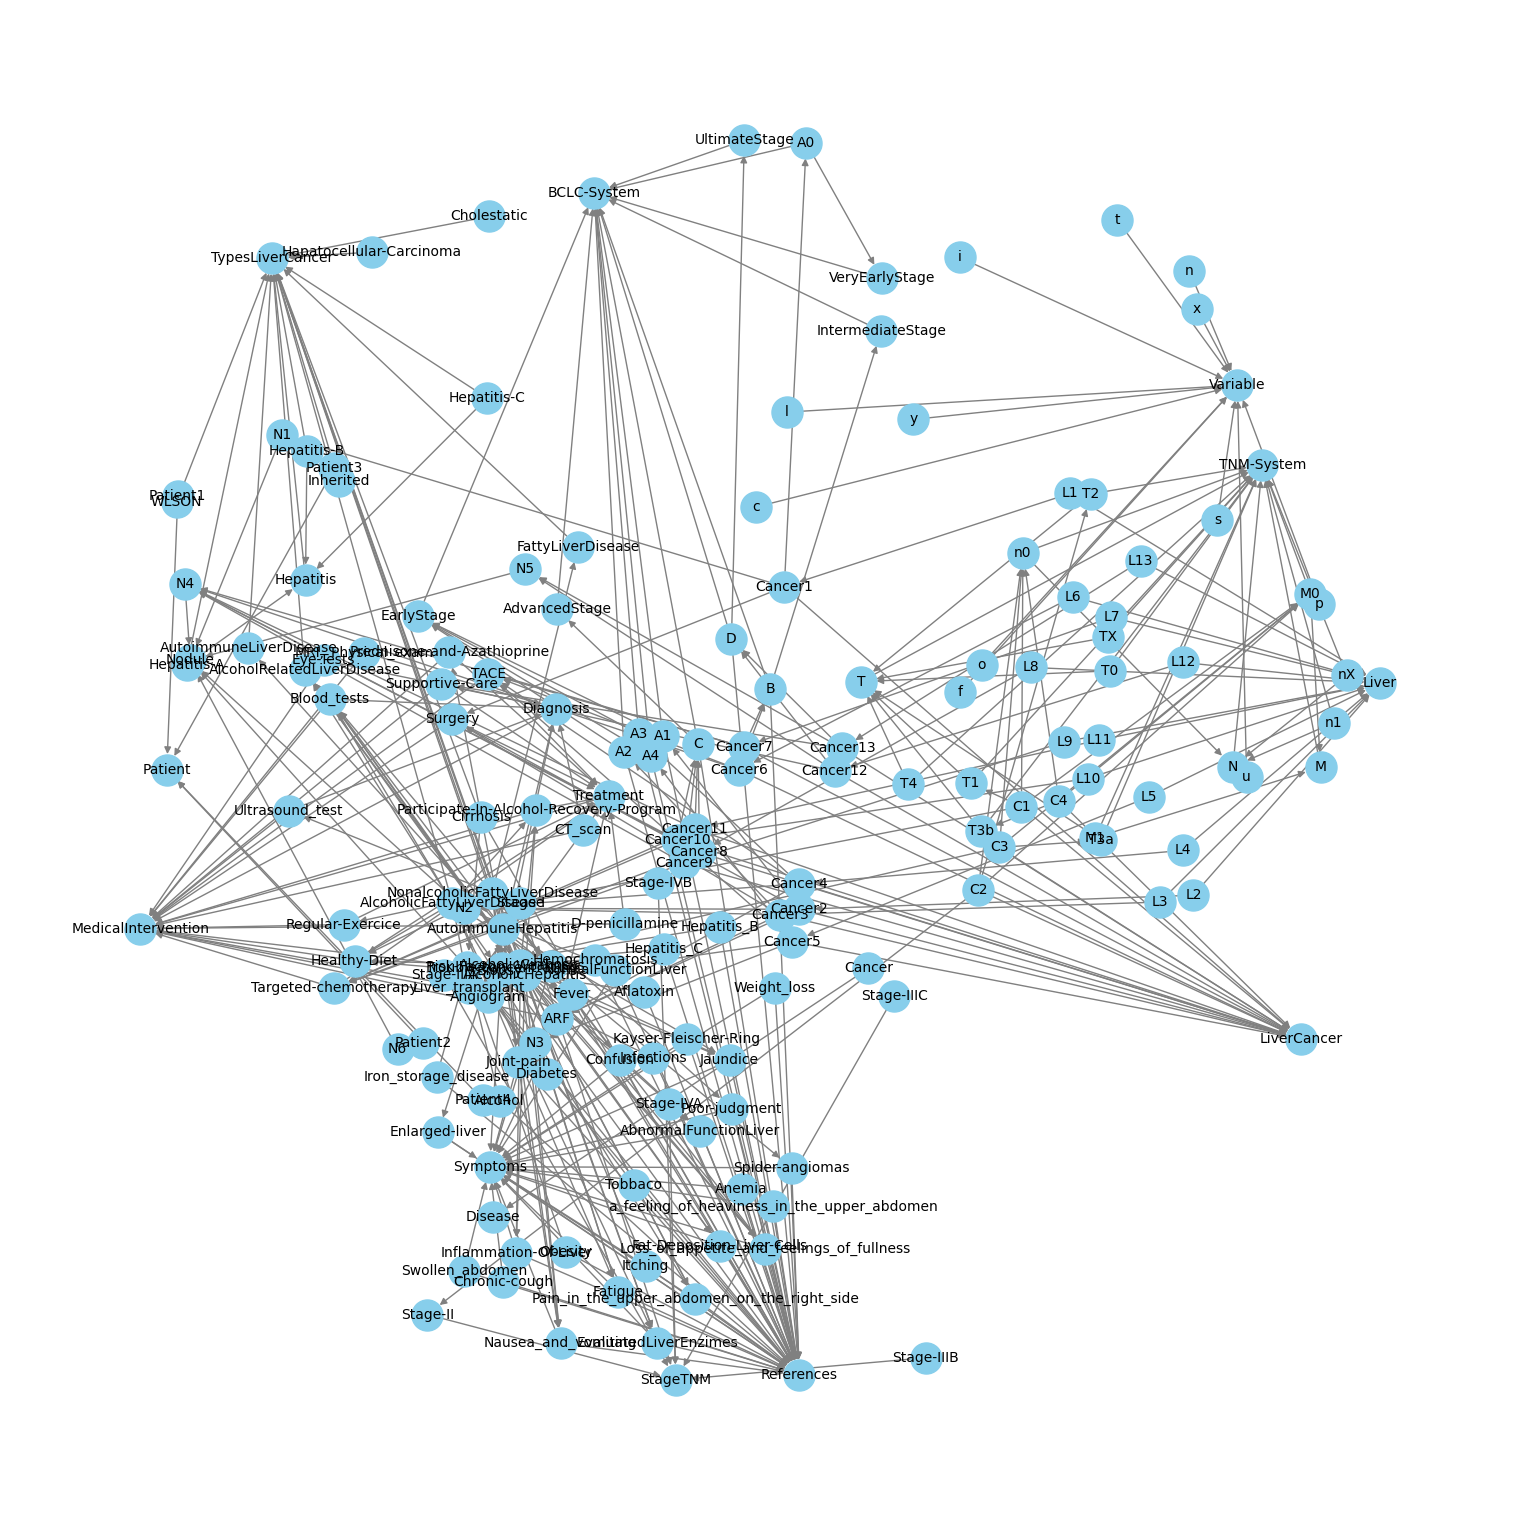

In [22]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load the JSON file
with open('out.json') as f:
    data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the JSON data
for edge in data['graphs']['edges']:
    sub_id = edge['sub'].split('#')[-1]
    obj_id = edge['obj'].split('#')[-1]
    G.add_node(edge['sub'], lbl=sub_id)
    G.add_node(edge['obj'], lbl=obj_id)
    G.add_edge(edge['sub'], edge['obj'], pred=edge['pred'])

# Create a dictionary mapping node IDs to labels
labels = {node: data['lbl'] for node, data in G.nodes(data=True)}

# Increase the figure size for a zoomed out view
plt.figure(figsize=(15, 15))

# Draw the graph with increased distance between nodes and smaller nodes
pos = nx.spring_layout(G, k=0.35)  # Increase value of k to increase distance between nodes
nx.draw(G, pos, labels=labels, node_color='skyblue', edge_color='grey', node_size=500, font_size=10)  # Decrease node_size to make nodes smaller

plt.show()

# Link prediction models

In [23]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.6 MB/s eta 0:00:00


In [24]:
!pip install --upgrade snore


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 2.7 MB/s eta 0:00:00
  Created wheel for snore: filename=snore-0.0.1-py3-none-any.whl size=1457 sha256=2aff34b52f445b2f4f475863d248489ecf5fe9dd3969440c1c569c04044fd0b0
  Stored in directory: /root/.cache/pip/wheels/df/58/07/3a929d50e9b0326a2e11eed3d16d3ed4f00dfce00dc213bd45
Successfully built snore


# Proximity methods

Adamic
Average ROC AUC: 0.501
Average AP: 0.521
Average time taken per split: 0.003 s

In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method Adamic --dataset /content/out.json --format json --out output-Adamic.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
ROC: 0.4781910009182736, AP: 0.5124158249158249
Split 2
ROC: 0.501951331496786, AP: 0.5292207792207791
Split 3
ROC: 0.4924242424242424, AP: 0.5060606060606061
Split 4
ROC: 0.5377640036730945, AP: 0.5264430014430015
Split 5
ROC: 0.4947199265381083, AP: 0.5303030303030303

--------------------------------------------
Method: Adamic
ROC: ['0.4781910009182736', '0.501951331496786', '0.4924242424242424', '0.5377640036730945', '0.4947199265381083']
AP: ['0.5124158249158249', '0

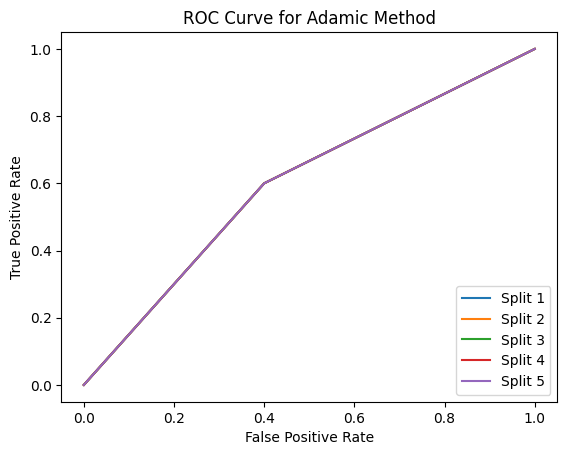

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Collectez les scores ROC pour chaque split
roc_scores = [0.4781910009182736, 0.501951331496786, 0.4924242424242424, 0.5377640036730945, 0.4947199265381083]

# Calculez les taux de faux positifs (FPR) et les taux de vrais positifs (TPR) pour chaque split
fpr_list = []
tpr_list = []
for roc_score in roc_scores:
    fpr, tpr, _ = roc_curve([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 0, 0, 1, 1, 1], pos_label=1)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Tracez les courbes ROC pour chaque split
plt.figure()
for i in range(len(fpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'Split {i+1}')

# Ajoutez les labels et la légende
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Adamic Method')
plt.legend(loc='lower right')
plt.show()


In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method Jaccard --dataset /content/out.json --format json --out output-Jaccard.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
ROC: 0.47692837465564736, AP: 0.4917628667628668
Split 2
ROC: 0.4979338842975206, AP: 0.4909511784511784
Split 3
ROC: 0.491505968778696, AP: 0.49302549302549303
Split 4
ROC: 0.537534435261708, AP: 0.5233645983645984
Split 5
ROC: 0.49012855831037644, AP: 0.48896705146705155

--------------------------------------------
Method: Jaccard
ROC: ['0.47692837465564736', '0.4979338842975206', '0.491505968778696', '0.537534435261708', '0.49012855831037644']
AP: ['0.4917628667628668

Average ROC: 0.7083922701565065
Average AP: 0.7160169274137591
Average time: 0.0003791448822026751


In [27]:
!python /content/link-prediciton/src/link_prediction.py --method Preferential --dataset /content/out.json --format json --out output-Preferential.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
ROC: 0.6472681359044996, AP: 0.6542610589937067
Split 2
ROC: 0.7015610651974288, AP: 0.7232633234876146
Split 3
ROC: 0.7464416896235078, AP: 0.7413441706108692
Split 4
ROC: 0.6903122130394859, AP: 0.6860096167178854
Split 5
ROC: 0.7583792470156105, AP: 0.7772044682577195

--------------------------------------------
Method: Preferential
ROC: ['0.6472681359044996', '0.7015610651974288', '0.7464416896235078', '0.6903122130394859', '0.7583792470156105']
AP: ['0.6542610589937

Average ROC: approximately 0.68
Average AP: approximately 0.72

In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method Spectral --dataset /content/out.json --format json --out output-Spectral.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
ROC: 0.6306244260789715, AP: 0.7186321214067626
Split 2
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
ROC: 0.6942148760330579, AP: 0.676044699

# knowledge graph embedding methods : that embed nodes as well as the relationships between them.
Average ROC: approximately 0.81
Average AP: approximately 0.87
Average execution time: approximately 3.72 seconds

In [28]:
!python /content/link-prediciton/src/link_prediction.py --method TransE --dataset /content/out.json --format json --out output-TransE.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
Epoch: 0: 640chunks [00:00, 6803.81chunks/s, loss=9.43, run:=TransE]         
Epoch: 1: 640chunks [00:00, 59727.98chunks/s, loss=9.19, run:=TransE]         
Epoch: 2: 640chunks [00:00, 71916.48chunks/s, loss=8.37, run:=TransE]         
Epoch: 3: 640chunks [00:00, 54290.80chunks/s, loss=9.09, run:=TransE]         
Epoch: 4: 640chunks [00:00, 69719.87chunks/s, loss=9.17, run:=TransE]         
Epoch: 5: 640chunks [00:00, 70533.25chunks/s, loss=7.65, run:=TransE]         
Epo

In [29]:
!python /content/link-prediciton/src/link_prediction.py --method RotatE --dataset /content/out.json --format json --out output-RotatE.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
Epoch: 0: 640chunks [00:00, 14883.64chunks/s, loss=10.5, run:=RotatE]         
Epoch: 1: 640chunks [00:00, 24491.84chunks/s, loss=10.1, run:=RotatE]         
Epoch: 2: 640chunks [00:00, 25551.90chunks/s, loss=9.51, run:=RotatE]         
Epoch: 3: 640chunks [00:00, 25631.19chunks/s, loss=8.87, run:=RotatE]         
Epoch: 4: 640chunks [00:00, 25742.04chunks/s, loss=8.33, run:=RotatE]         
Epoch: 5: 640chunks [00:00, 24356.72chunks/s, loss=7.56, run:=RotatE]         
Ep

# GNN methods

The GAT (Graph Attention Network) method achieved the following average performance across the five splits:

Average ROC: approximately 0.70
Average AP: approximately 0.66
Average execution time: approximately 4.44 seconds

In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method GAT --dataset /content/out.json --format json --out output-GAT.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
Epoch 0, loss 0.6747210621833801
Epoch 1, loss 0.6195129752159119
Epoch 2, loss 0.5945293307304382
Epoch 3, loss 0.5675564408302307
Epoch 4, loss 0.5482168793678284
Epoch 5, loss 0.5363166332244873
Epoch 6, loss 0.530255913734436
Epoch 7, loss 0.522793710231781
Epoch 8, loss 0.515985906124115
Epoch 9, loss 0.5103345513343811
Epoch 10, loss 0.5076826214790344
Epoch 11, loss 0.5051748156547546
Epoch 12, loss 0.5022528767585754
Epoch 13, loss 0.4999654293060303
Epoch 14, los

In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method GIN --dataset /content/out.json --format json --out output-GIN.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
Epoch 0, loss 0.6967443823814392
Epoch 1, loss 0.5932573676109314
Epoch 2, loss 0.5640316605567932
Epoch 3, loss 0.5563749074935913
Epoch 4, loss 0.5475159287452698
Epoch 5, loss 0.536167562007904
Epoch 6, loss 0.5262916088104248
Epoch 7, loss 0.5197550654411316
Epoch 8, loss 0.5125548243522644
Epoch 9, loss 0.5080922842025757
Epoch 10, loss 0.5034366250038147
Epoch 11, loss 0.4992537498474121
Epoch 12, loss 0.4932217001914978
Epoch 13, loss 0.49121320247650146
Epoch 14, 

In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method GCN --dataset /content/out.json --format json --out output-GCN.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
Epoch 0, loss 0.6500242948532104
Epoch 1, loss 0.6002323031425476
Epoch 2, loss 0.5782996416091919
Epoch 3, loss 0.566493034362793
Epoch 4, loss 0.5541476607322693
Epoch 5, loss 0.5409979820251465
Epoch 6, loss 0.5308060050010681
Epoch 7, loss 0.5176261067390442
Epoch 8, loss 0.513709306716919
Epoch 9, loss 0.5092799663543701
Epoch 10, loss 0.5086077451705933
Epoch 11, loss 0.5014104843139648
Epoch 12, loss 0.49681952595710754
Epoch 13, loss 0.48990100622177124
Epoch 14, 

In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method GAE --dataset /content/out.json --format json --out output-GAE.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
Epoch 0, loss 0.6902892589569092
Epoch 1, loss 0.683684766292572
Epoch 2, loss 0.6729039549827576
Epoch 3, loss 0.6580356359481812
Epoch 4, loss 0.6449624300003052
Epoch 5, loss 0.6292175054550171
Epoch 6, loss 0.6086191534996033
Epoch 7, loss 0.5896832942962646
Epoch 8, loss 0.567716658115387
Epoch 9, loss 0.5413767099380493
Epoch 10, loss 0.5147677063941956
Epoch 11, loss 0.4860866367816925
Epoch 12, loss 0.45861196517944336
Epoch 13, loss 0.4382553994655609
Epoch 14, l

In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method TransE --dataset /content/out.json --format json --out output-GAT.txt


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
Epoch: 0: 640chunks [00:00, 47996.61chunks/s, loss=9.39, run:=TransE]         
Epoch: 1: 640chunks [00:00, 62129.21chunks/s, loss=9.16, run:=TransE]         
Epoch: 2: 640chunks [00:00, 44042.63chunks/s, loss=8.31, run:=TransE]         
Epoch: 3: 640chunks [00:00, 37872.35chunks/s, loss=9.09, run:=TransE]         
Epoch: 4: 640chunks [00:00, 53816.25chunks/s, loss=9.13, run:=TransE]         
Epoch: 5: 640chunks [00:00, 64952.44chunks/s, loss=7.61, run:=TransE]         
Ep

# Recommandation of missing link in the graph using Preferential method

In [30]:
!pwd

/content


In [33]:
!sudo python /content/link-prediciton/examples/recommendation_generation.py

Redundant

Missing
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#References, Score: 1.0
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#Symptoms, Score: 0.5777777777777777
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#MedicalIntervention, Score: 0.4444444444444444
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer, Score: 0.37777777777777777
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontolog

# Recommendation using TransE , RotatE , Preferential methods

In [37]:
!python /content/link-prediciton/examples/recommendation_generation_transe.py

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#Targeted-chemotherapy - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#References, Score: 1.0
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#Targeted-chemotherapy - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#Symptoms, Score: 0.5777777777777777
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#Targeted-chemotherapy - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer, Score: 0.37777777777777777
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#Targeted-chemotherapy - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#TypesLiverCancer, Score: 0.37777777777777777
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-o

# RotatE

In [ ]:
!python /content/link-prediciton/examples/recommendation_generation_transe.py

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#C3 - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#TACE, Score: 0.0012340941466391087
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#C3 - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#L2, Score: 0.0012092625256627798
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#C3 - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#D, Score: 0.0011837815400213003
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#C3 - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#Liver, Score: 0.0011814518366008997
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#C3 - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ont

# final graph visualisation

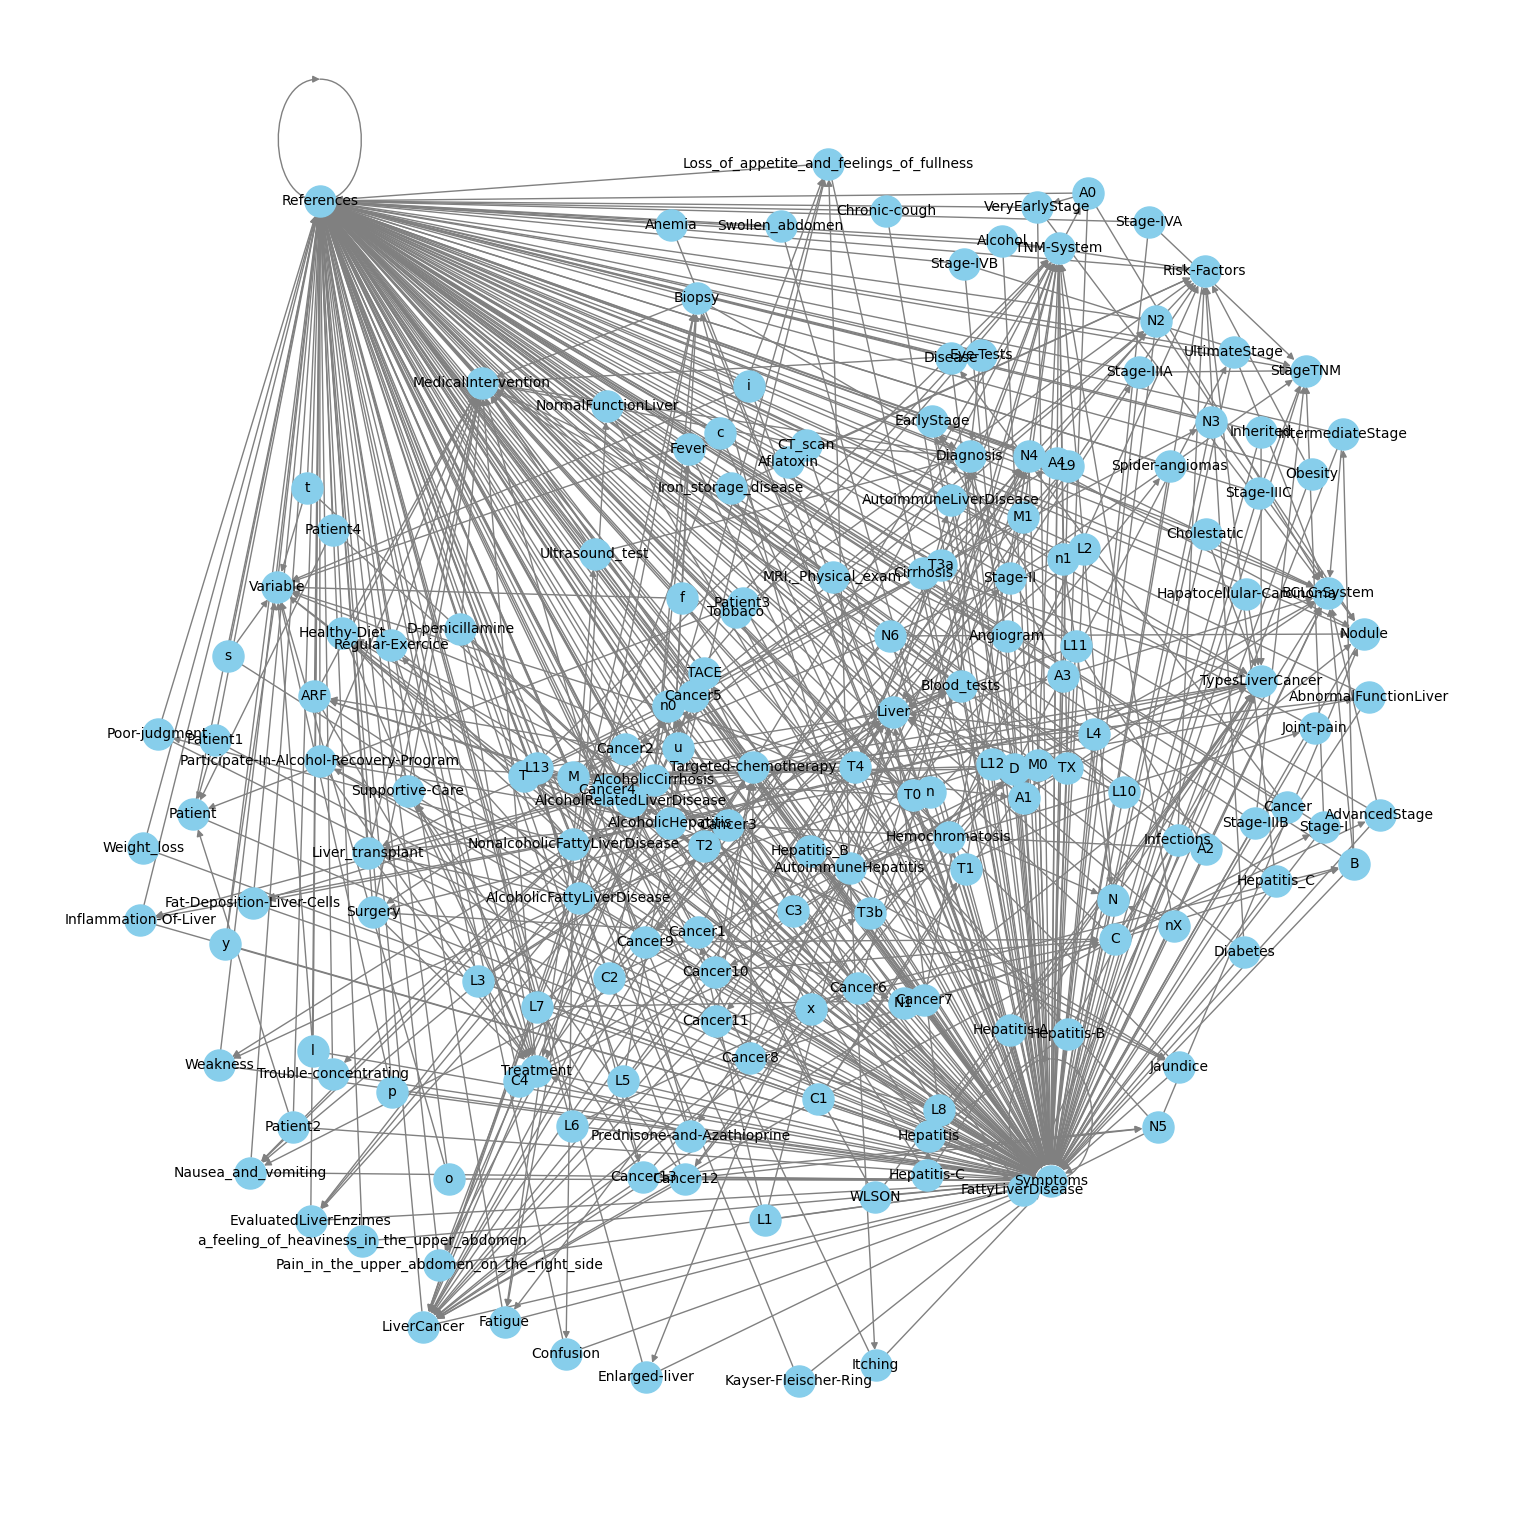

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load the JSON file
with open('out-with-missing-links.json') as f:
    data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the JSON data
for edge in data['graphs']['edges']:
    sub_id = edge['sub'].split('#')[-1]
    obj_id = edge['obj'].split('#')[-1]
    G.add_node(edge['sub'], lbl=sub_id)
    G.add_node(edge['obj'], lbl=obj_id)
    G.add_edge(edge['sub'], edge['obj'], pred=edge['pred'])

# Create a dictionary mapping node IDs to labels
labels = {node: data['lbl'] for node, data in G.nodes(data=True)}

# Increase the figure size for a zoomed out view
plt.figure(figsize=(15, 15))

# Draw the graph with increased distance between nodes and smaller nodes
pos = nx.spring_layout(G, k=0.35)  # Increase value of k to increase distance between nodes
nx.draw(G, pos, labels=labels, node_color='skyblue', edge_color='grey', node_size=500, font_size=10)  # Decrease node_size to make nodes smaller

plt.show()

# Verification

In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method Preferential --dataset /content/out-with-missing-links.json --format json --out output-Preferential-with-missing-links.txt

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 456
Negative edges in training set: 456
Positive edges in test set: 112
Negative edges in test set: 112
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
ROC: 0.8009002770083105, AP: 0.8559919474457693
Split 2
ROC: 0.8828100954139736, AP: 0.9003105272998305
Split 3
ROC: 0.8986995998768852, AP: 0.910012938591783
Split 4
ROC: 0.8356417359187441, AP: 0.8772279331019637
Split 5
ROC: 0.8987165178571429, AP: 0.9131739163548369

--------------------------------------------
Method: Preferential
ROC: ['0.8009002770083105', '0.8828100954139736', '0.8986995998768852', '0.8356417359187441', '0.8987165178571429']
AP: ['0.855991947445

In [ ]:
!python /content/link-prediciton/examples/validation.py

Redundant

Missing
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#MedicalIntervention, Score: 0.12571428571428572
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer, Score: 0.10857142857142857
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#TypesLiverCancer, Score: 0.10857142857142857
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#AlcoholicHepatitis, Score: 0.10285714285714286
http://www.semanticweb.org/stagiaire1/ontologies/2016/5/untitled-ontology-49#LiverCancer - http://www.semanticweb.org/stagiaire1/

In [ ]:
!python /content/link-prediciton/src/link_prediction.py --method Preferential --dataset /content/out-with-missing-links-final.json --format json --out output-final-with-missing-links.txt

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)

--------------------------------------------
Positive edges in training set: 264
Negative edges in training set: 264
Positive edges in test set: 66
Negative edges in test set: 66
Positive edges in validation set: 0
Negative edges in validation set: 0
--------------------------------------------

Split 1
ROC: 0.6472681359044996, AP: 0.6542610589937067
Split 2
ROC: 0.7015610651974288, AP: 0.7232633234876146
Split 3
ROC: 0.7464416896235078, AP: 0.7413441706108692
Split 4
ROC: 0.6903122130394859, AP: 0.6860096167178854
Split 5
ROC: 0.7583792470156105, AP: 0.7772044682577195

--------------------------------------------
Method: Preferential
ROC: ['0.6472681359044996', '0.7015610651974288', '0.7464416896235078', '0.6903122130394859', '0.7583792470156105']
AP: ['0.6542610589937